In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil

In [ ]:
classes= ['nv','mel','bkl','bcc','akiec','vasc','df']
base_dir="dataSet"
try:
    os.mkdir(base_dir)
except:
        pass

In [ ]:
train_dir="train_dir"
test_dir="test_dir"
try:
    for i in classes:
        os.makedirs(os.path.join(os.getcwd(),base_dir,train_dir,i))
except:
    pass

try:
    for i in classes:
        os.makedirs(os.path.join(os.getcwd(),base_dir,test_dir,i))
except:
    pass

In [ ]:
df=pd.read_csv(r"/content/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
y=df.dx
df_train,df_test=train_test_split(df,test_size=0.1,random_state=100,stratify=y)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(9013, 7)
(1002, 7)


In [ ]:
df_train['dx'].value_counts()

nv       6034
mel      1002
bkl       989
bcc       463
akiec     294
vasc      128
df        103
Name: dx, dtype: int64

In [ ]:
df_test['dx'].value_counts()

nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: dx, dtype: int64

In [ ]:
all_img=list(df.image_id)
train_img=list(df_train.image_id)
test_img=list(df_train.image_id)

In [ ]:
df.set_index('image_id', inplace=True)

In [ ]:
folder_1 = os.listdir(r'/content/HAM10000_images_part_1')
folder_2 = os.listdir(r'/content/HAM10000_images_part_2')

In [ ]:
for imgs in all_img:
    full_imgname=imgs+'.jpg'
    if imgs in train_img:
        sub_dir=train_dir
    else:
        sub_dir=test_dir
    if full_imgname in folder_1:
        source_dir=os.path.join(r'/content/HAM10000_images_part_1',full_imgname)
    else:
        source_dir=os.path.join(r'/content/HAM10000_images_part_2',full_imgname)       
    label=df.loc[imgs,'dx']
    final_dir=os.path.join(os.getcwd(),base_dir,sub_dir,label,full_imgname)
    shutil.copyfile(source_dir, final_dir)

In [ ]:
img_save=Image.open("/content/HAM10000_images_part_1/ISIC_0027419.jpg")

In [ ]:
#model.ipynb

In [ ]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil
import cv2
import matplotlib.pyplot as plt

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten,Dense

In [ ]:
classes= ['nv','mel','bkl','bcc','akiec','vasc','df']
base_dir="dataSet"
train_dir="train_dir"
test_dir="test_dir"

In [ ]:
x_train=[]
y_train=[]

for i in classes:
    path=os.path.join(os.getcwd(),base_dir,train_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28))
        x_train.append(show_img)
        y_train.append(i)

In [ ]:
x_train_n=np.array(x_train)
y_train_n=np.array(y_train)

In [ ]:
print(x_train_n.shape)
print(y_train_n.shape)

(9013, 28, 28, 3)
(9013,)


In [ ]:
x_test=[]
y_test=[]

for i in classes:
    path=os.path.join(os.getcwd(),base_dir,test_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28),interpolation=cv2.INTER_AREA)
        x_test.append(show_img)
        y_test.append(i)

In [ ]:
x_test_n=np.array(x_test)
y_test_n=np.array(y_test)

In [ ]:
print(x_test_n.shape)
print(y_test_n.shape)

(1002, 28, 28, 3)
(1002,)


In [ ]:
y_test_n =pd.get_dummies(y_test_n)
y_train_n =pd.get_dummies(y_train_n)

In [ ]:
print(y_test_n.shape)
print(y_train_n.shape)

(1002, 7)
(9013, 7)


In [ ]:
def preprocess(img):
    img = img/255
    return img

x_test_n = np.array(list(map(preprocess, x_test_n)))
x_train_n = np.array(list(map(preprocess, x_train_n)))

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation='sigmoid'))
model.add(Dense(7,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train_n,y=y_train_n,verbose=1,batch_size=128,epochs=20,shuffle='True',validation_data=(x_test_n,y_test_n))

Epoch 1/20
71/71 [==============================] - 8s 114ms/step - loss: 1.1028 - accuracy: 0.6620 - val_loss: 1.1004 - val_accuracy: 0.6357
Epoch 2/20
71/71 [==============================] - 9s 128ms/step - loss: 0.9605 - accuracy: 0.6717 - val_loss: 0.9138 - val_accuracy: 0.6796
Epoch 3/20
71/71 [==============================] - 9s 122ms/step - loss: 0.9102 - accuracy: 0.6820 - val_loss: 1.0216 - val_accuracy: 0.6627
Epoch 4/20
71/71 [==============================] - 8s 111ms/step - loss: 0.9017 - accuracy: 0.6788 - val_loss: 0.8805 - val_accuracy: 0.6906
Epoch 5/20
71/71 [==============================] - 8s 111ms/step - loss: 0.8714 - accuracy: 0.6860 - val_loss: 0.8521 - val_accuracy: 0.6906
Epoch 6/20
71/71 [==============================] - 8s 111ms/step - loss: 0.8597 - accuracy: 0.6887 - val_loss: 0.9163 - val_accuracy: 0.6826
Epoch 7/20
71/71 [==============================] - 8s 111ms/step - loss: 0.8386 - accuracy: 0.6956 - val_loss: 0.8667 - val_accuracy: 0.6876
Epoch 

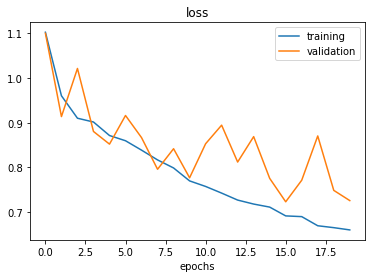

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['training','validation'])

KeyError: ignored

In [ ]:
score=model.evaluate(x_test_n,y_test_n,verbose=0)
print(" test score: {} ".format(score[0]))
print("test accuracy: {}".format(score[1]))

 test score: 0.7256481647491455 
test accuracy: 0.7495009899139404
